In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
%matplotlib inline

In [2]:
notebook_dir = Path(os.getcwd())
data_dir = notebook_dir.parent/'data'
output_dir = notebook_dir.parent/'output'

code_dir = notebook_dir.parent/'code'
sys.path.append(str(code_dir))

In [3]:
from HgDietSimulator import *

# Code Explanation and Examples

## Diet Dictionaries

### **Types of Dictionaries Used in the Model**

There are two primary types of dictionaries that determine how the model selects foods:

---

#### **1. Food Group Percentages**
These dictionaries define the **percentage of total daily calories** to allocate to each food group. These values are multiplied by the daily calorie target (e.g., 2020 kcal) to determine how many calories should come from each group.

- **Naming Convention:**  
  `region[suffix]_required_percentages`

##### Suffixes:
- `wosns`: Without Salmon, replaced by **non-salmon** species  
- `wosm`: Without Salmon, replaced by **moose/caribou**  
- `wos`: General "without salmon" (used for count dictionaries where species isn't specified)  
- *no suffix*: General "with salmon"

- **Examples:**
  - `interior_required_percentages` – Interior with salmon  
  - `interiorwosns_required_percentages` – Interior **without salmon**, replaced by **non-salmon** species  
  - `interiorwosm_required_percentages` – Interior **without salmon**, replaced by **moose/caribou**

---

#### **2. Food Group Selection Counts**
These dictionaries specify the **number of individual food items** to randomly select from each food group.

- **Naming Convention:**  
  `region[suffix]_selection_counts`

##### Suffixes:
- `wos`: Without salmon  
- *no suffix*: With salmon

- **Examples:**
  - `interior_selection_counts` – Interior with salmon  
  - `interiorwos_selection_counts` – Interior **without salmon**

> **Note:** Selection count dictionaries do **not** distinguish between non-salmon or moose replacements; they only indicate that salmon is included or excluded.


In [4]:
coastalwosm_required_percentages

{'Animal Products': 0.0003,
 'Non-Salmon': 0.0707,
 'Game': 0.0262,
 'Moose and Caribou': 0.2105,
 'Marine Mammal': 0.0279,
 'Sugared Drinks': 0.16,
 'Store Fruit and Fruit Juice': 0.07,
 'Dairy and Eggs': 0.08,
 'Grains': 0.12,
 'Imported Protein': 0.07,
 'Vegetable Fats': 0.07,
 'Mixed Dishes': 0.05,
 'Sweeteners and Candy': 0.03}

In [5]:
coastalwos_selection_counts

{'Animal Products': 1,
 'Non-Salmon': 1,
 'Game': 1,
 'Moose and Caribou': 1,
 'Marine Mammal': 1,
 'Sugared Drinks': 1,
 'Store Fruit and Fruit Juice': 2,
 'Dairy and Eggs': 1,
 'Grains': 1,
 'Imported Protein': 1,
 'Vegetable Fats': 1,
 'Mixed Dishes': 1,
 'Sweeteners and Candy': 1}

## Generating Diets

The following functions are used to generate a diet or a series of diets. These function also tracks calories, traditional calories, and total mercury content.

---

**Function Name:** `create_diet()`  
**Function:** Creates a diet based on the conditions set.

- `data` – DataFrame holding all of the food choices (see `data` folder)
- `calorie_cap` – Max number of calories eaten per day
- `protein_type` – Specifies protein availability based on region and climate impact  
  (e.g., `'Interior with Salmon'`, `'Coastal without Salmon (non-salmon)'`,`'Coastal without Salmon (moose)'`)
- `condition` – Degree of warming/climate impact (e.g., `'Normal'`, `'Moderate'`, `'Severe'`)
- `threshold` – How close the created diet should be to the `calorie_cap`
- `max_iterations` – Number of times the program will try to find a suitable diet before stopping

---
**Function Name:** `generate_multiple_diets)`  
**Function:** Creates a given number of diets.
- `data` – DataFrame holding all of the food choices (see `data` folder)
- `calorie_cap` – Max number of calories eaten per day
- `protein_type` – Specifies protein availability based on region and climate impact  
  (e.g., `'Interior with Salmon'`, `'Coastal without Salmon (non-salmon)'`,`'Coastal without Salmon (moose)'`)
- `conditions` – Degree of warming/climate impact (e.g., `['Normal']`, `['Moderate']`, `['Severe']`)
- `threshold` – How close the created diet should be to the `calorie_cap`
- `num_diets`- number of diets you are creating


In [6]:
diet_df, cal, tradcal,thg,reqcal=create_diet(data, calorie_cap=2020, protein_type='Interior with Salmon', condition='Normal',threshold=0.05, max_iterations=1000)

In [7]:
diets=generate_multiple_diets(data, calorie_cap=2020, protein_type='Interior with Salmon', conditions=['Normal'],threshold=0.05, num_diets=2)

In [8]:
print(diet_df[['Item', 'Scaled Calories','Mercury Content']])

                             Item  Scaled Calories  Mercury Content
0                          Burbot           38.583           11.789
1                   Snowshoe Hare           29.686            0.156
2                         Caribou          128.270            0.303
3                     Pink Salmon          163.424            8.236
4              Low Bush Cranberry            3.641            0.033
5                      Soft drink          242.400            0.025
6                         Lettuce           33.666            0.027
7                         Lettuce           33.666            0.027
8                        potatoes           33.664            0.004
9                     Apple Sauce          111.100            0.022
10  Apple Juice, canned sweetened          111.099            0.024
11                      Ice cream          262.600            0.036
12                      Spagehtti          302.994            0.021
13                    Beef, steak          141.3

## Diet Distribution Plots

The following functions generate total mercury distribution plots for different scenarios caused by climate change:

The output for all functions is stored in `.pkl` files.

---

**Function Name:** `proteinscenario()`  
**Scenario:** Protein substitution due to diet change  
**Function:** Limits the proteins the model can choose from:  
- Includes salmon  
- Excludes salmon (replaced with moose)  
- Excludes salmon (replaced with non-salmon species)  

---

**Function Name:** `permafrostthaw()`  
**Scenario:** Increasing permafrost thaw  
**Function:** Increases the mercury content in fish and marine mammals by:  
- 21% (moderate)  
- 175% (severe)  

---

**Function Name:** `both()`  
**Scenario:** Changing diet and moderate permafrost thaw  
**Function:**  
- Mercury content in fish and marine mammals increases by 21%  
- Protein options are limited as in the `proteinscenario()` function  

---

The examples below use the functions to generates 100 random daily coastal diets under different climate change scenarios and their associated metadata. For the paper, we generate 10,000 daily random diets.

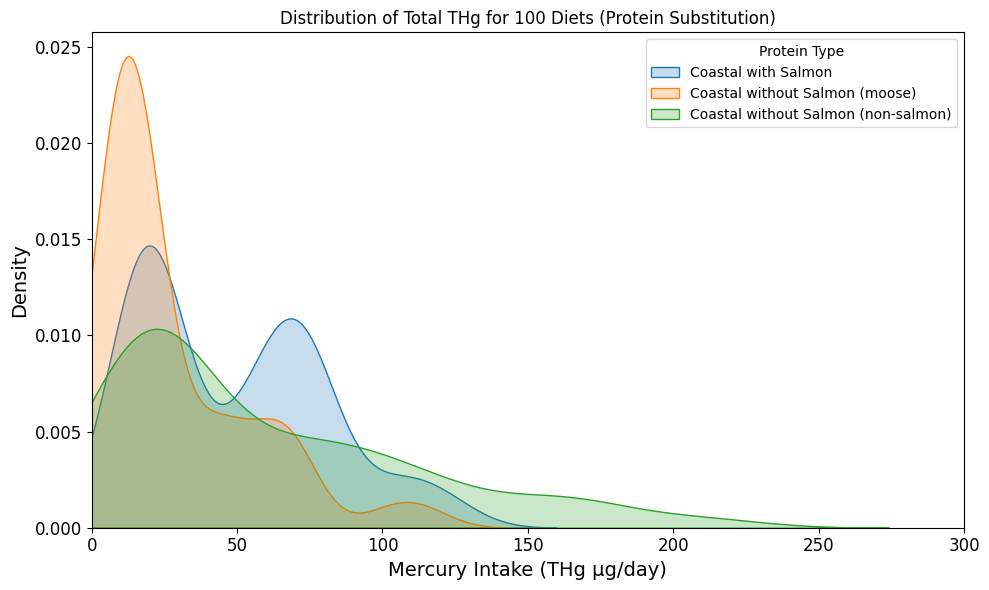

Simulation results saved.


In [57]:
thg_data, diet_data = proteinscenario(store_file_name=output_dir/'coastal protein 100.pkl', num_diets=100,region='Coastal')

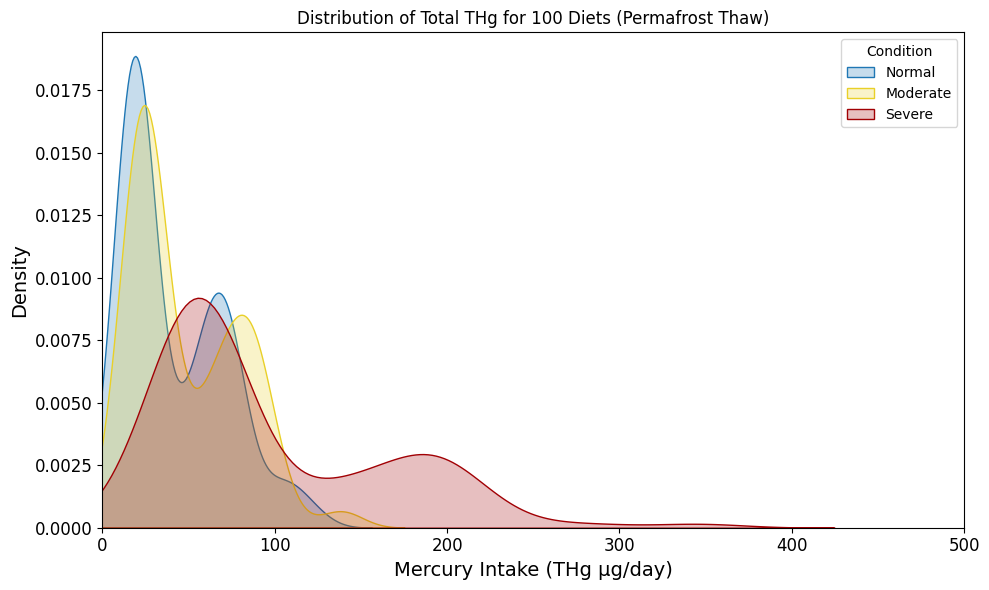

Simulation results saved.


In [59]:
thg_data, diet_data = permafrostthaw(store_file_name=output_dir/'coastal permafrost 100.pkl', num_diets=100,region='Coastal')

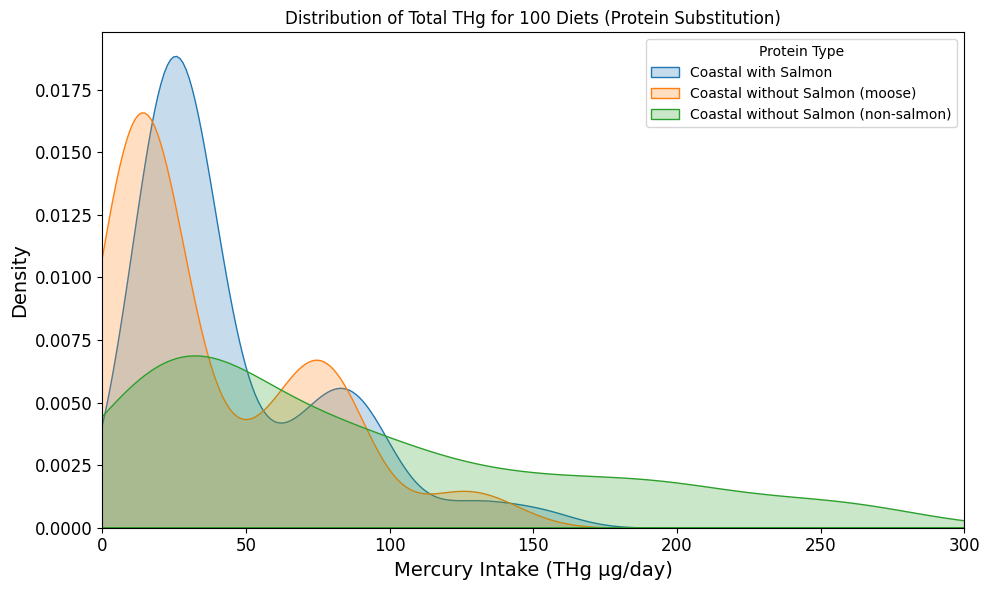

Simulation results saved.


In [60]:
thg_data, diet_data = both(store_file_name=output_dir/'coastal both 100.pkl', num_diets=100,region='Coastal')

### Extracting Peak Data

**Function Name:** `exportpeakdata()`  
**Function:** Lets you define peaks and returns the diets that result in total mercury most similar to those values.
- `simulation`- Climate change scenarios (`Protein` or `Permafrost Thaw`
- `loadfile`- name of `.pkl` file holding generated diets
- `region`- `Coastal` or `Interior`
- `exportname`- name of `.csv` file to export data to
- `targets` -  peaks of interest 
  
Values were then annotated on Adobe Illustrator for the final version of Figure 3.


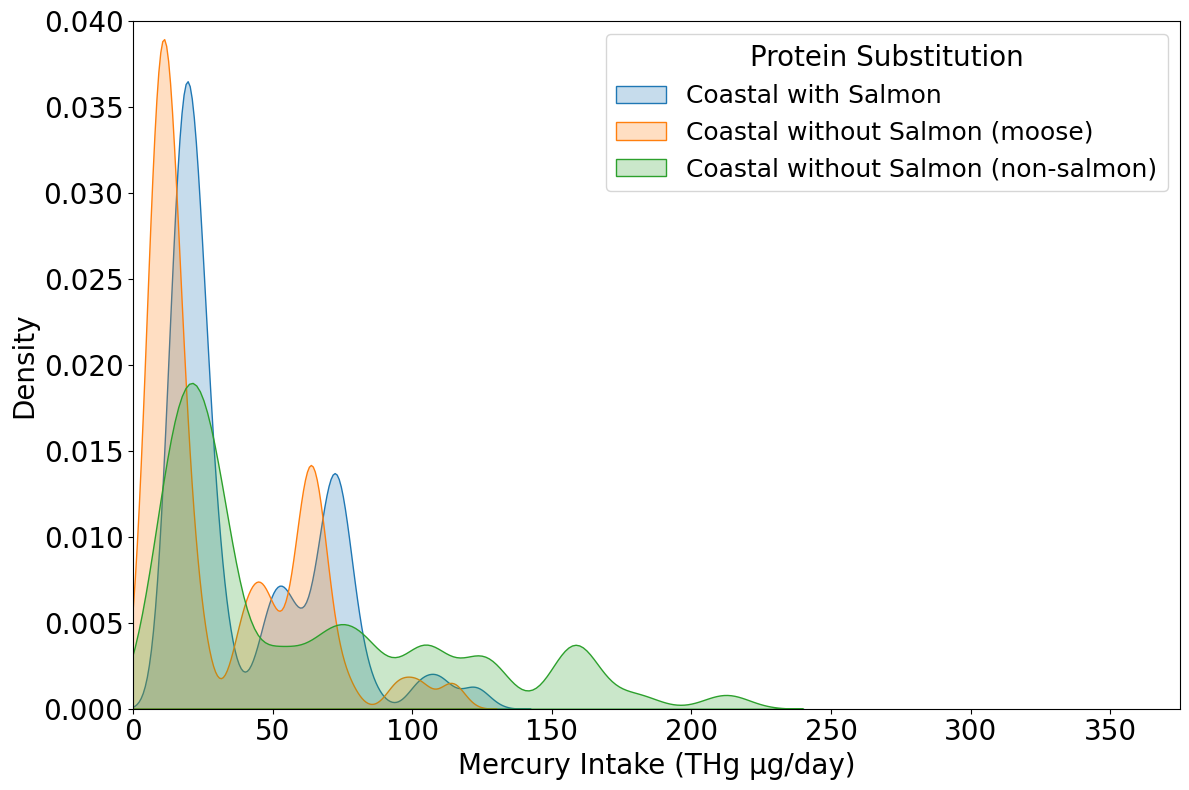

Length of exported DataFrame: 15, rows containing missing values: 0
Results saved.


In [12]:
exportpeakdata(simulation='Protein',loadfile=output_dir/"coastal protein 10k second draft.pkl", region='Coastal',exportname=output_dir/"coastal diet protein results.csv", targets=[45,54])

In [56]:
df = pd.read_csv(output_dir/"coastal diet protein results.csv")

# Get and clean the "Diet" column from the first row
print ('Target THg:',df.loc[0,'Target THg'])
print ('Protein Type:',df.loc[0,'Protein Type'])
print ('THg:',df.loc[0,'THg'])
raw_diet = df.loc[0, "Diet"]
print("\nRaw Diet:")
print(raw_diet)

# Check if there are actual line breaks or escape characters in the raw diet string
diet_lines = raw_diet.split('\n')  # Split on the actual line break '\n'

# Clean up the diet lines (strip spaces and remove empty lines)
diet_lines = [line.strip() for line in diet_lines if line.strip()]

# Print the cleaned diet from the first row
print("\nCleaned Diet from first row:")
for line in diet_lines:
    print(line)

Target THg: 45
Protein Type: Coastal with Salmon
THg: 45.0

Raw Diet:
                             Item  Amount (g)  Calories  THg (ng/g)   
0                         Halibut         100       116     292.000  \
1             Lesser Canada Geese         100       161       2.500   
2                           Moose         100       130       3.000   
3                     Coho Salmon         100       140      43.000   
4                          Walrus         100       199      21.000   
5                            Tang         100       250       0.041   
6   Apple Juice, canned sweetened         100        46       0.099   
7                      Apple, raw         100        57       0.110   
8                            Eggs         100       147       0.390   
9                      Dark Bread         100       259       0.370   
10                        Hot Dog         100       310       0.360   
11                         Crisco         100       917       0.250   
12     

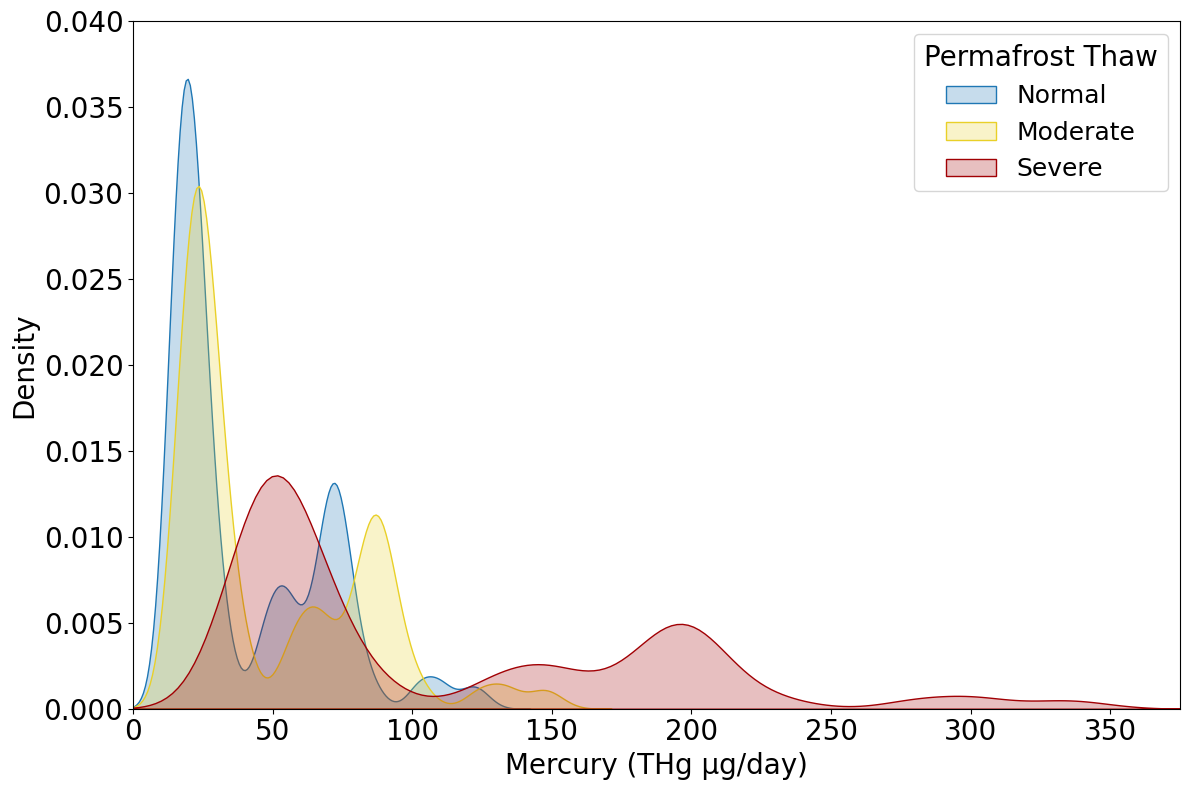

Length of exported DataFrame: 28, rows containing missing values: 0
Results saved.


In [50]:
exportpeakdata(simulation='Permafrost Thaw',loadfile= output_dir/"coastal permafrost thaw 10k second draft.pkl", region='Coastal', exportname=output_dir/"coastal permafrost thaw result.csv", targets=[55,75])

In [52]:
df = pd.read_csv(output_dir/"coastal permafrost thaw result.csv")

# Get and clean the "Diet" column from the first row
print ('Target THg:',df.loc[0,'Target THg'])
print ('Climate Condition:',df.loc[0,'Climate Condition'])
print ('THg:',df.loc[0,'THg'])
raw_diet = df.loc[0, "Diet"]
print("\nRaw Diet:")
print(raw_diet)

# Check if there are actual line breaks or escape characters in the raw diet string
diet_lines = raw_diet.split('\n')  # Split on the actual line break '\n'

# Clean up the diet lines (strip spaces and remove empty lines)
diet_lines = [line.strip() for line in diet_lines if line.strip()]

# Print the cleaned diet from the first row
print("\nCleaned Diet from first row:")
for line in diet_lines:
    print(line)

Target THg: 55
Climate Condition: Normal
THg: 54.99

Raw Diet:
                             Item  Amount (g)  Calories  THg (ng/g)   
0                         Halibut         100       116     292.000  \
1                         Mallard         100       152      89.300   
2                           Moose         100       130       3.000   
3                     Chum Salmon         100       120      41.000   
4                    Spotted Seal         100       110     130.000   
5                            Tang         100       250       0.041   
6                         Peaches         100        39       0.046   
7   Apple Juice, canned sweetened         100        46       0.099   
8                       Ice cream         100       207       0.280   
9                      Dark Bread         100       259       0.370   
10      Cold Cuts and Lunch Meats         100       214       0.510   
11                     Mayonnaise         100       361       0.230   
12            

## Yearly Total Mercury Intake

These functions estimate yearly mercury intake by repeatedly sampling from simulated daily diets.

---

**Function Name:** `permafrost_thaw_yearly_distribution()`  
**Scenario:** Increased permafrost thaw  
**Purpose:**  
- Repeats the process `num_runs` times  
- Each time, it randomly samples `num_samples` total mercury values from the daily diet data stored in a `.pkl` file representing permafrost thaw scenarios  
- Returns the mean and standard deviation of the sampled values for each level of thaw severity  

---

**Function Name:** `proteinyearly_distribution()`  
**Scenario:** Protein substitution due to changing diet  
**Purpose:**  
- Repeats the process `num_runs` times  
- Each time, it randomly samples `num_samples` total mercury values from the daily diet data stored in a `.pkl` file representing different protein access scenarios (e.g., with or without salmon)  
- Returns the mean and standard deviation of the sampled values for each dietary protein condition

---
**Function Name:** `yearly_distribution_data()`  
**Purpose:** Creates bar plots with standard deviation bars showing yearly mercury intake (Figure 4 in the paper).

---

For the paper, we sampled (`num_samples = 365`) days from the pool of 10,000 daily diets (stored in `.pkl` files), repeated `num_runs = 10,000` times for all scenarios to represent yearly mercury intake.



In [14]:
proteinyearly_distribution(file_name=output_dir/'interior protein 10k second draft.pkl',proteins=['Interior with Salmon'], num_samples=365, num_runs=10000)

{'Interior with Salmon': {'mean': 4383.958952, 'std_dev': 83.9180270024367}}

In [15]:
permafrost_thaw_yearly_distribution(file_name=output_dir/'interior permafrost thaw 10k second draft.pkl',condition=['Moderate'], num_samples=365, num_runs=10000)

{'Moderate': {'mean': 5219.884255000001, 'std_dev': 103.66547748418938}}

In [16]:
os.chdir(output_dir)

Coastal Means and Standard Deviations:
Control: Mean = 14663.85, Standard Deviation = 524.96
A: Mean = 21928.71, Standard Deviation = 995.15
B: Mean = 11505.20, Standard Deviation = 529.06
C: Mean = 17729.18, Standard Deviation = 636.74
D: Mean = 39763.77, Standard Deviation = 1445.85
A,C: Mean = 26049.86, Standard Deviation = 1184.75
B,C: Mean = 13841.97, Standard Deviation = 637.27

Interior Means and Standard Deviations:
Control: Mean = 4382.92, Standard Deviation = 84.99
A: Mean = 10243.79, Standard Deviation = 415.94
B: Mean = 2417.71, Standard Deviation = 80.02
C: Mean = 5219.42, Standard Deviation = 102.08
D: Mean = 11379.83, Standard Deviation = 228.53
A,C: Mean = 12216.22, Standard Deviation = 498.19
B,C: Mean = 2802.71, Standard Deviation = 97.88


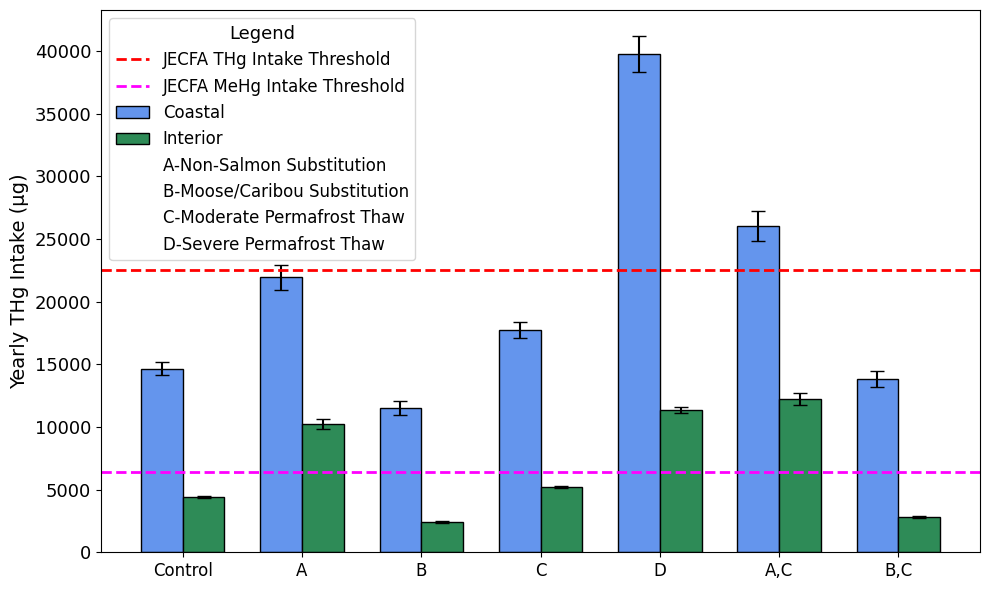

In [17]:
yearly_distributions_data()

## Regenerating Figure 3: Total THg Distribution Plots

The function **`exportpeakdata()`** and the following `.pkl` files (located in the `output` folder) can be used to regenerate the distribution plots shown in **Figure 3** of the paper.

#### Required `.pkl` Files:
1. "interior permafrost thaw 10k second draft.pkl"
2. "interior protein 10k second draft.pkl"
3. "interior coastal both 10k second draft.pkl"
4. "interior permafrost thaw 10k second draft.pkl"
5. "interior protein 10k second draft.pkl"
6. "interior coastal both 10k second draft.pkl"


